In [10]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime

In [115]:
# Load connection lines data
with open ('Метро-время-пересадки-между-станциями.json', 'r') as file_c:
    data_connection = json.load(file_c)

In [14]:
# Load JSON data from a file
with open('metro_time_between_stations.json', 'r') as file:
    data = json.load(file)
    
    

In [12]:
# Define the weight function with time restriction logic
def weight_function(weight, current_time, restricted_start, restricted_end):
    if restricted_start <= current_time < restricted_end:
        return float('inf')  # Effectively make the edge non-traversable
    return weight

In [13]:
# Create a directed graph
graph = nx.DiGraph()


In [7]:
def clean_time_value(time):
    if ',' in time:
        time = time.replace(',', '.')
    return time
    

In [116]:
# Add edges to the graph
for entry in data:
    id_st1 = entry['id_st1']
    id_st2 = entry['id_st2']
    time = float(clean_time_value(entry['time']))
    graph.add_edge(id_st1, id_st2, weight=time)

for entry in data_connection:
    id_st1 = entry['id1']
    id_st2 = entry['id2']
    time = float(clean_time_value(entry['time']))
    graph.add_edge(id_st1, id_st2, weight=time)

In [117]:
# Define the restricted time range (2 PM to 3 PM)
restricted_start = datetime.strptime("14:00:00", "%H:%M:%S").time()
restricted_end = datetime.strptime("15:00:00", "%H:%M:%S").time()

In [118]:
# Function to get the dynamic weight for an edge
def get_dynamic_weight(u, v, current_time, restricted_start, restricted_end):
    original_weight = graph[u][v]['weight']
    return weight_function(original_weight, current_time, restricted_start, restricted_end)


In [119]:
# Function to apply dynamic weights and find the shortest path using Dijkstra's algorithm
def find_shortest_path(graph, start, end, current_time, restricted_start, restricted_end):
    # Create a new graph with adjusted weights based on the current time
    adjusted_graph = nx.DiGraph()
    
    for u, v, data in graph.edges(data=True):
        dynamic_weight = get_dynamic_weight(u, v, current_time, restricted_start, restricted_end)
        adjusted_graph.add_edge(u, v, weight=dynamic_weight)
    
    # Use Dijkstra's algorithm to find the shortest path
    try:
        shortest_path = nx.dijkstra_path(adjusted_graph, source=start, target=end)
        shortest_path_length = nx.dijkstra_path_length(adjusted_graph, source=start, target=end)
        return shortest_path, shortest_path_length
    except nx.NetworkXNoPath:
        return None, float('inf')

In [120]:
# Get the current time for this example (in a real scenario, you would use the actual current time)
current_time = datetime.now().time()

In [121]:
# Define the start and end nodes for the shortest path search
start_node = '1'
end_node = '4'

In [122]:
# Find the shortest path
path, path_length = find_shortest_path(graph, start_node, end_node, current_time, restricted_start, restricted_end)


In [123]:
# Print the shortest path and its length
if path:
    print(f"Shortest path: {path} with length {path_length}")
else:
    print("No path found between the nodes within the given constraints.")

Shortest path: ['1', '2', '3', '4'] with length 9.0


In [28]:
# Optionally, you can print the edges to verify
# print("Graph edges with weights:")
# for u, v, weight in graph.edges(data='weight'):
#     print(f"({u}, {v}, {weight})")


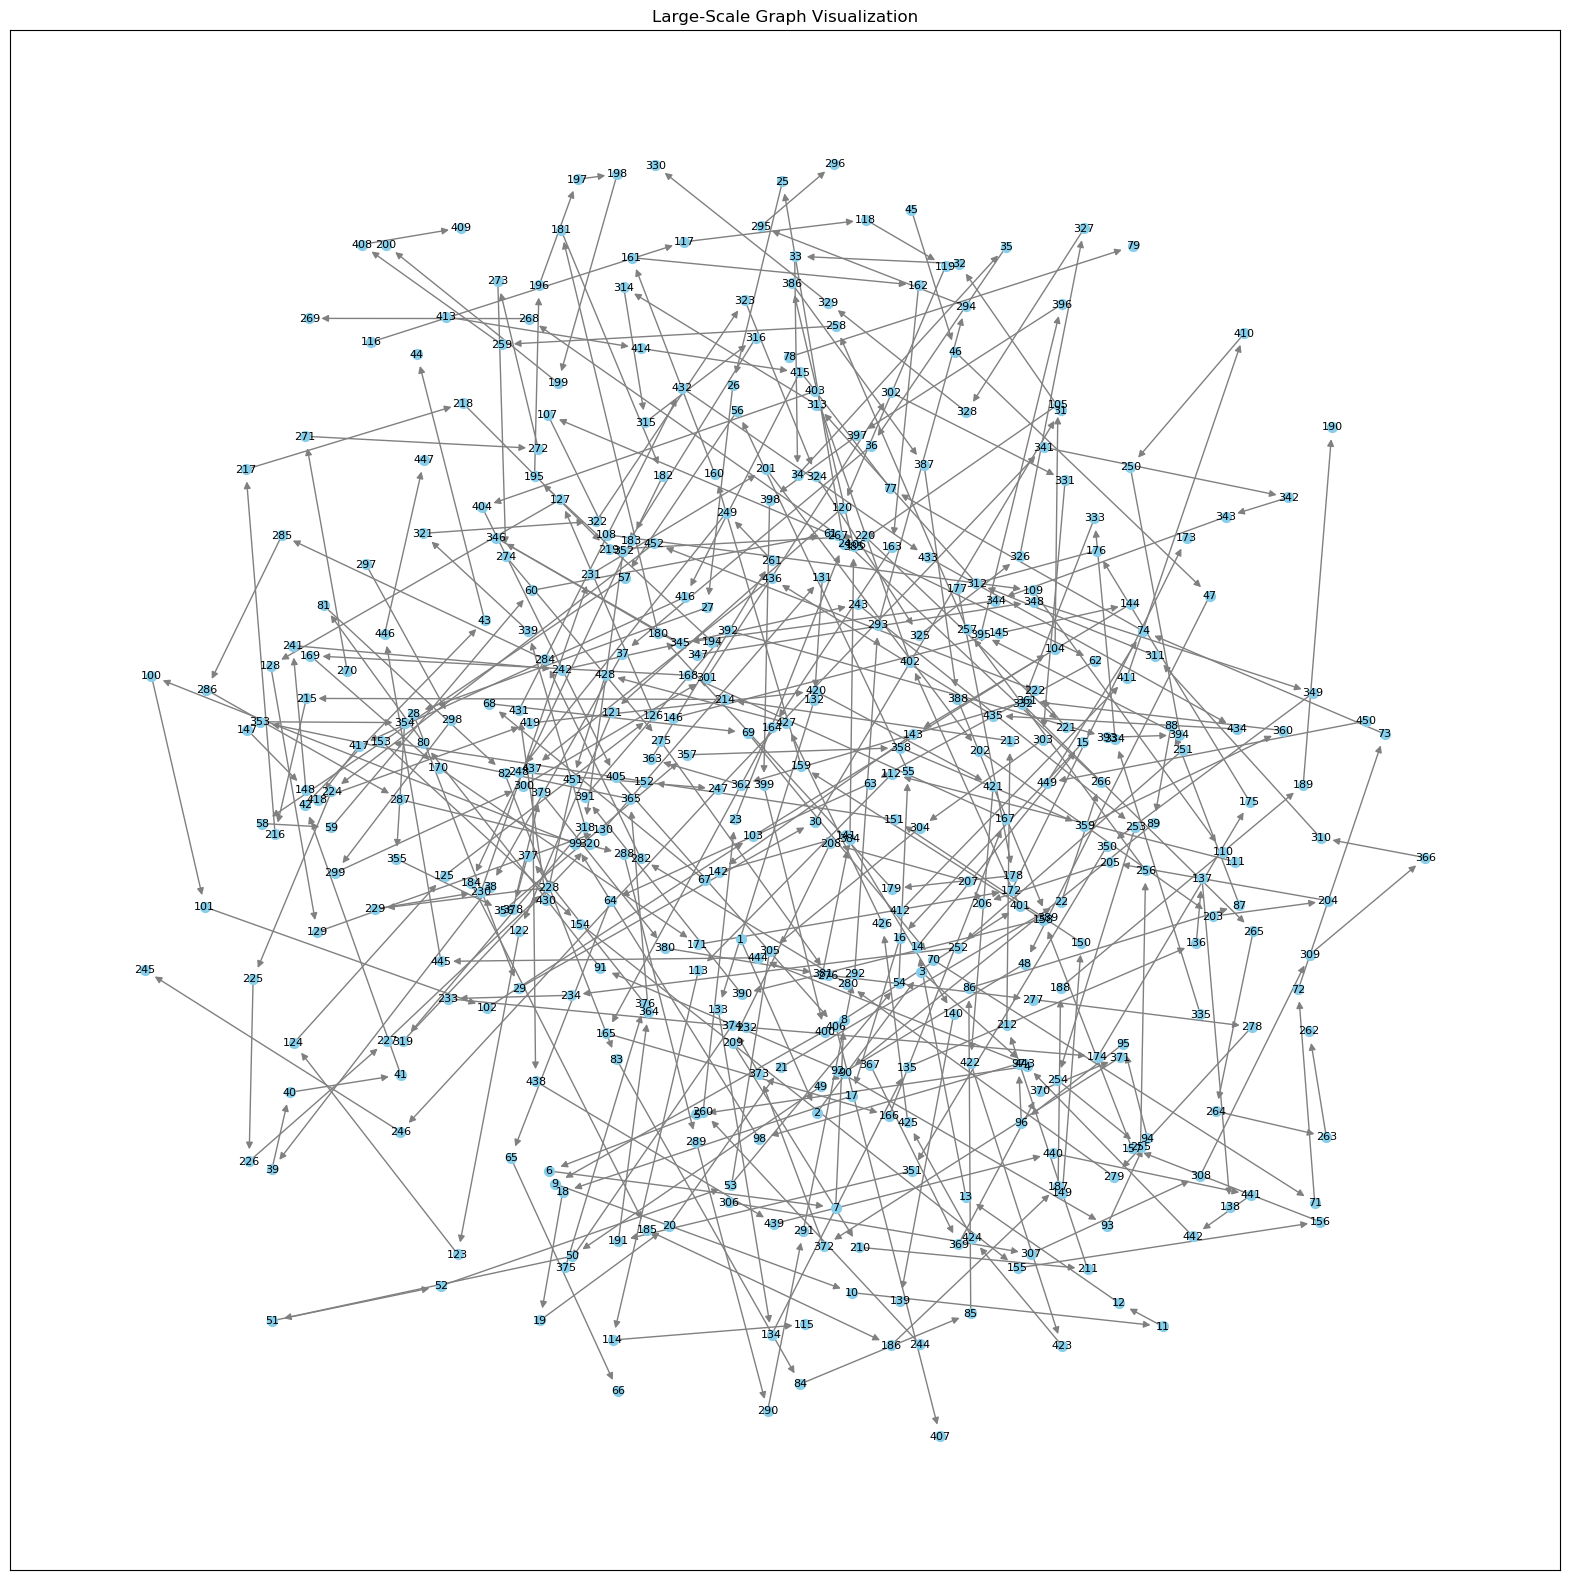

In [31]:
# Define the layout for large-scale graph visualization
plt.figure(figsize=(20, 20))  # Set the size of the plot

# Use spring layout for better spacing
pos = nx.spring_layout(graph, k=0.15, iterations=20)

# Draw the nodes and edges
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color='skyblue')
nx.draw_networkx_edges(graph, pos, edge_color='gray')

# Optionally add labels (comment this out if too cluttered)
nx.draw_networkx_labels(graph, pos, font_size=8)

# Optionally add edge labels (comment this out if too cluttered)
# edge_labels = nx.get_edge_attributes(graph, 'weight')
# nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6)

# Show the plot
plt.title("Large-Scale Graph Visualization")
plt.show()

### Verification

In [33]:
# Create an undirected graph
graph_b = nx.Graph()

In [34]:
# Add edges to the graph
for entry in data:
    id_st1 = entry['id_st1']
    id_st2 = entry['id_st2']
    time = float(clean_time_value(entry['time']))
    graph_b.add_edge(id_st1, id_st2, weight=time)

for entry in data:
    id_st1 = entry['id_st1']
    id_st2 = entry['id_st2']
    time = float(clean_time_value(entry['time']))
    graph.add_edge(id_st1, id_st2, weight=time)    

In [111]:
# Define the start and end nodes
start_node = '224' #'422'
end_node = '357'#'222'#'452'#'224'

In [112]:
# Check if there is a path between the start and end nodes
path_exists = nx.has_path(graph_b, source=start_node, target=end_node)


In [113]:
# Print whether a path exists or not
if path_exists:
    print(f"A path exists between nodes {start_node} and {end_node}.")
else:
    print(f"No path exists between nodes {start_node} and {end_node}.")

No path exists between nodes 224 and 357.


In [114]:
# If path exists, find and print the shortest path
if path_exists:
    try:
        shortest_path = nx.dijkstra_path(graph_b, source=start_node, target=end_node)
        shortest_path_length = nx.dijkstra_path_length(graph_b, source=start_node, target=end_node)
        print(f"Shortest path: {shortest_path} with length {shortest_path_length}")
    except nx.NetworkXNoPath:
        print("No path found using Dijkstra's algorithm.")

